<a href="https://colab.research.google.com/github/Grover1204/Vehicle-Detection-using-convolutional-neural-network/blob/main/Vehicle_Detection_using_convolutional_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Vehicle Detection using convolutional neural network (CNN)**

# Introduction
The goal of this project is to develop a machine learning model capable of detecting vehicles in images. This model will helpful for various applications such as in autonomous driving systems, traffic monitoring, and security surveillance. I have used convolutional neural network (CNN) to identify images into two classes are vehicle and non-vehicle. We trained and evaluated the CNN model on a dataset containing images of vehicles and non-vehicles.


In [ ]:
# packages to load
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# packages to create a model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import BatchNormalization

import urllib.request

# packages for visualisation
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

In [ ]:
#install the Kaggle API Python package
!pip install -q kaggle

In [ ]:
#Uploading file  the Google Colab environment
# Upload Kaggle.json file to authenticate and access the Kaggle API, which is used to download datasets
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"grover009","key":"fdf161c1cce90fcca49c91e278960423"}'}

In [ ]:
# First, install the Kaggle API client
!pip install kaggle

# Next, upload your Kaggle API credentials file (kaggle.json) to Colab by clicking on the folder icon on the left sidebar, selecting "Files", and then uploading the file.

# Create a directory for the API credentials
!mkdir ~/.kaggle

# Copy the API credentials to the directory
!cp kaggle.json ~/.kaggle/

# Set the file permissions for the credentials file
!chmod 600 ~/.kaggle/kaggle.json

# List the available datasets to test if the API is properly configured
!kaggle datasets list

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                        title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                      Spotify and Youtube                              9MB  2023-03-20 15:43:25           6125        233  1.0              
erdemtaha/cancer-data                                      Cancer Data                                     49KB  2023-03-22 07:57:00           1961         46  1.0              
ulrikthygepedersen/fastfood-nutrition                      Fastfood Nutrition                              12KB  2023-03-21 10:02

In [ ]:
# Api command to downlaod Vehicle detection dataset from kaggle
! kaggle datasets download -d brsdincer/vehicle-detection-image-set

 90% 107M/119M [00:01<00:00, 55.1MB/s] 
100% 119M/119M [00:01<00:00, 72.5MB/s]


In [ ]:
# command to unzip the vehicle detection data set
! unzip vehicle-detection-image-set.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/vehicles/4414.png  
  inflating: data/vehicles/4415.png  
  inflating: data/vehicles/4416.png  
  inflating: data/vehicles/4417.png  
  inflating: data/vehicles/4418.png  
  inflating: data/vehicles/4419.png  
  inflating: data/vehicles/442.png   
  inflating: data/vehicles/4420.png  
  inflating: data/vehicles/4421.png  
  inflating: data/vehicles/4422.png  
  inflating: data/vehicles/4423.png  
  inflating: data/vehicles/4424.png  
  inflating: data/vehicles/4425.png  
  inflating: data/vehicles/4426.png  
  inflating: data/vehicles/4427.png  
  inflating: data/vehicles/4428.png  
  inflating: data/vehicles/4429.png  
  inflating: data/vehicles/443.png   
  inflating: data/vehicles/4430.png  
  inflating: data/vehicles/4431.png  
  inflating: data/vehicles/4432.png  
  inflating: data/vehicles/4433.png  
  inflating: data/vehicles/4434.png  
  inflating: data/vehicles/4435.png  
  inflating: data/vehicles/4436.png  

In [ ]:
# path to directories containing images of non-vehicles and vehicles
non_vec="/content/data/non-vehicles"
vec='/content/data/vehicles'

Load and plotting images  from two folders.  The load_images function is used to load vehicle images and non-vehicle images from their  folders And visualizing images after loading and plot sample images of 5 random from both vehicle and non-vehicle images

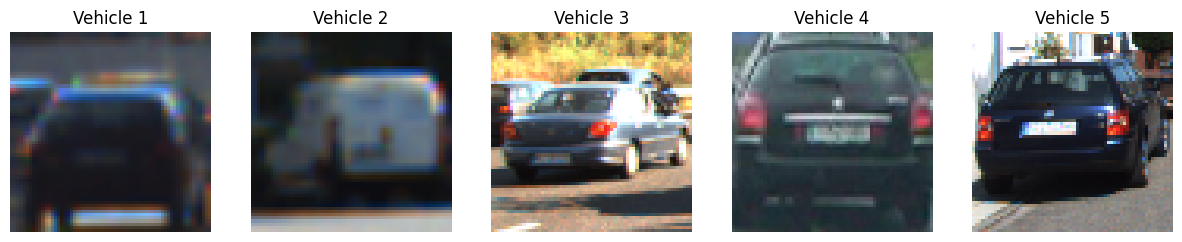

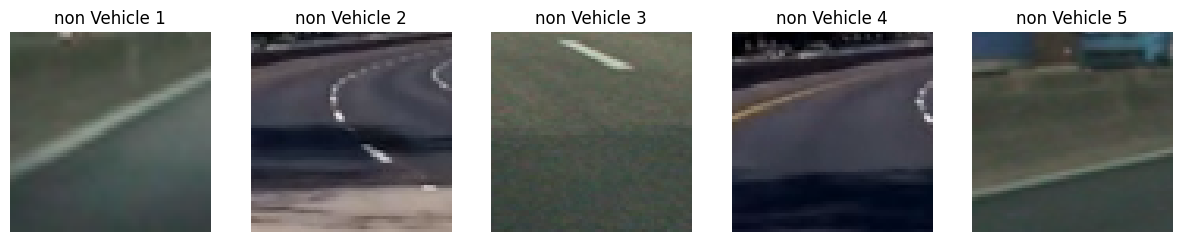

In [ ]:
def load_images(folder_path):
    image_files = os.listdir(folder_path)
    images = [Image.open(os.path.join(folder_path, img_file)) for img_file in image_files]
    return images

vehicles = load_images(vec)
non_vehicles = load_images(non_vec)

def plot_sample_images(images, title, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
    for i, ax in enumerate(axes):
        random_img = random.choice(images)
        ax.imshow(random_img)
        ax.set_title(f'{title} {i + 1}')
        ax.axis('off')
    plt.show()

plot_sample_images(vehicles, 'Vehicle')
plot_sample_images(non_vehicles, 'non Vehicle')

# Dataset
One of the most critical aspects of a machine learning project is having a proper dataset and appropriate data for training and testing the model. Without suitable data, the model may underfit and fail to perform the intended task effectively. Ensuring that the dataset has the correct data structure and consistent sizes is a crucial step in preparing the data for successful machine learning outcomes.



resize() function is used to resize the images of both the vehicles and non-vehicles. In this dataset i am trying to resize all the images to 64 * 64 size. Taking some random image size and the random resized image.

In [ ]:
target_size = (64, 64)  # Change this tuple to the desired size (width, height)

def resize_images(images, target_size):
    return [img.resize(target_size) for img in images]

# Print the size of a random image from the vehicle folder
random_vehicle_img = random.choice(vehicles)
print(f"Original size of a random vehicle image: {random_vehicle_img.size}")

# Resize all the images
vehicles_resized = resize_images(vehicles, target_size)
non_vehicles_resized = resize_images(non_vehicles, target_size)

# Print the size of a random resized image from the vehicle folder
random_vehicle_resized_img = random.choice(vehicles_resized)
print(f"Resized size of a random vehicle image: {random_vehicle_resized_img.size}")


Original size of a random vehicle image: (64, 64)
Resized size of a random vehicle image: (64, 64)


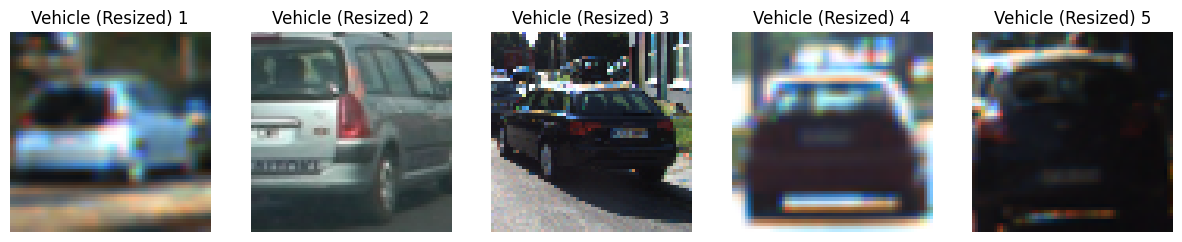

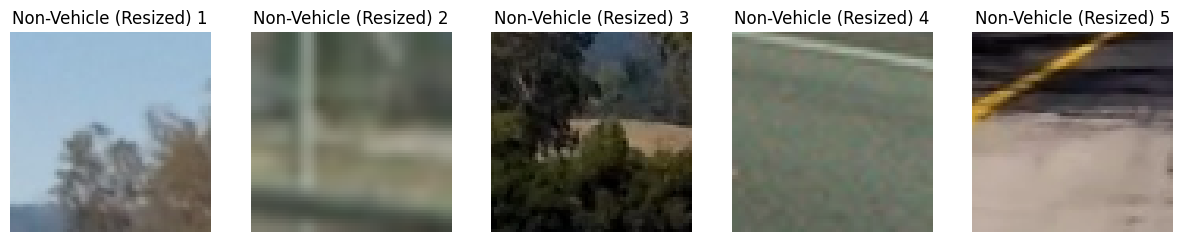

In [ ]:
# plotting few samples
plot_sample_images(vehicles_resized, 'Vehicle (Resized)')
plot_sample_images(non_vehicles_resized, 'Non-Vehicle (Resized)')

In [ ]:
print(f'Vehicles count {len(vehicles_resized)}')

Vehicles count 8792


In [ ]:
print(f'Vehicles count {len(non_vehicles_resized)}')

Vehicles count 8968


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import BatchNormalization

# Combine the data and create labels
data = vehicles_resized + non_vehicles_resized
labels = [1] * len(vehicles_resized) + [0] * len(non_vehicles_resized)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [ ]:
# Preprocess the images
X_train = np.array([np.array(img) for img in X_train]) / 255.0
X_test = np.array([np.array(img) for img in X_test]) / 255.0
y_train = np.array(y_train)
y_test = np.array(y_test)

# CNN architecture
In this project i designed a  CNN architecture with fully connected layers with several layers implemented by using the keras sequential model.
four Conv2D layers with increasing filters, one flatten layer and dense layer
CNN with four Conv2D layers that will extract  complex features from the input images
The Each Conv2D layer with increase number of filters is followed by batchNormalization layer, maxpooling2d layer and a dropout layer.

1. Conv2D is one of the core and important  blocks of Convolutional neural networds(CNN) used for image processing tasks such as image classification, object detection and segmentation. Conv2d layers performs Convolution mathematical operation. The dot product between kernel and pixels allows to learn and extract features such as corners and textures from input image. Conv2D layer plays a crucial role in the performance of CNN for image processing task. This will help the machine learn and extract complex features from the input image.

The hyperparameters that are used in Conv2D arekernel_size, activation and input shape. The kernel(3 * 3) is used to determine the size of the Conv2D layer and the type of features it can extract from the image. Activation = 'relu' (rectified linear unit) is also a hyperparameter that specifies the activation function used in the Conv2D layer. The ReLU function returns the input value if it is positive and zero if it is negative. The input shape specifies the shape of the input image to the Conv2D layer.

2. The BatchNormalization layer is one of the important layers in Conv2D. It operates on mini batches of input data rather than the entire dataset. This layer helps the neural network improve stability and efficiency by normalizing the activations of the previous layers.

3. MaxPooling2D layer is used to reduce the spatial dimensions of the output of the previous layer and retain most important features and find patterns.

4. The Dropout layer helps to prevent overfitting by randomly dropping out some of the neurons in the previous layer during training. In this architecture we are droping 20% neurons in previous layer of randonly dropped each training epoch

5. The Flatten() layer is one of the important component is used to convert the output of the previous layer from a 2D matrix (or tensor) to a 1D vector. The flatten() layer is flattens the 3d tensor into a 1d vector by reshaping the tensor into a vector.  This allows the output of the convolutional layers to feed to the fully connected layers. its helps the network to make predictions on the input layer.

6. Dense () is used in neural network to perform a fully connected operation. One of the dense layer has 512 neurons and uses the ReLU activation function. This neuron is adjusted to optimize the performance of the network

In [ ]:
# Define the more complex CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])


# Model
model.compile() function is an important step in neural network. The choice of optimizer, loss function, and evaluation metrics depends on the specific task and dataset being used.

The optimizer parameter specifies the optimization algorithm used to update the weights and biases of the network during training. In this case, the adam optimizer is used, which is a popular optimization algorithm that is efficient and easy to use.

The loss parameter specifies the loss function used to measure the difference between the predicted output of the network and the actual output. In this case, the binary_crossentropy loss function is used, which is commonly used for binary classification problems.

The metrics parameter specifies the evaluation metric used to measure the performance of the network during training and testing. In this case, the accuracy metric is used, which measures the fraction of correctly classified samples.

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
epochs = 2
batch_size = 64

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

# Predict and calculate accuracy
y_pred = model.predict(X_test)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

accuracy = np.sum(np.array(y_pred) == y_test) / len(y_test)
print(f"Test accuracy: {accuracy:.4f}")

# Display the model summary
model.summary()

Epoch 1/2
178/178 [==============================] - 152s 829ms/step - loss: 0.1450 - accuracy: 0.9441 - val_loss: 6.4535 - val_accuracy: 0.5144
Epoch 2/2
111/111 [==============================] - 10s 89ms/step
Test accuracy: 0.5206
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                    

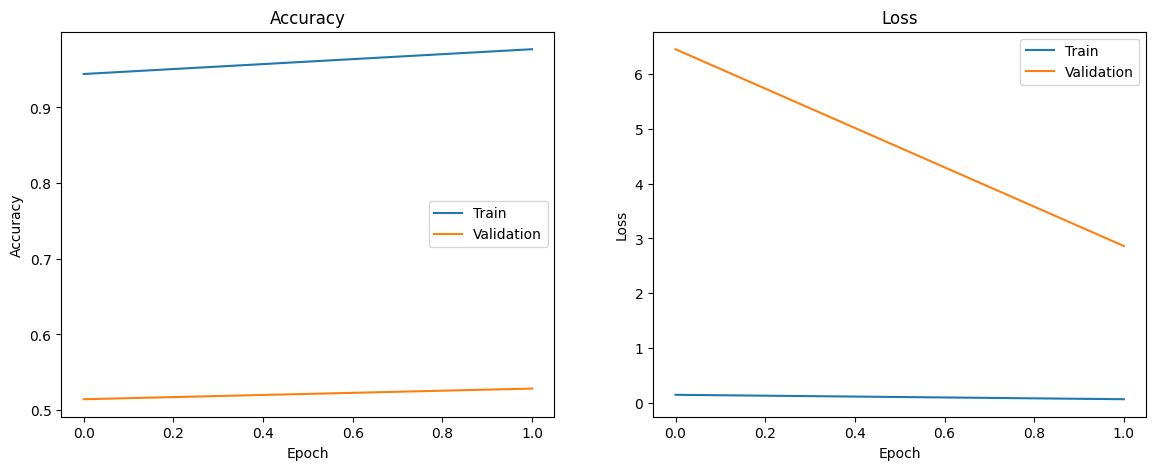

In [ ]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Plot training and validation accuracy
    ax1.plot(history.history['accuracy'], label='Train')
    ax1.plot(history.history['val_accuracy'], label='Validation')
    ax1.set_title('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()

    # Plot training and validation loss
    ax2.plot(history.history['loss'], label='Train')
    ax2.plot(history.history['val_loss'], label='Validation')
    ax2.set_title('Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()

    plt.show()

plot_history(history)

1/1 [==============================] - 0s 155ms/step


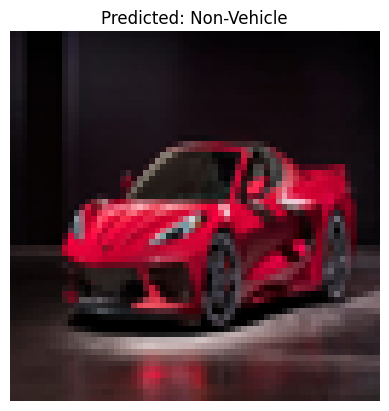

In [ ]:
import urllib.request

# Download an image from the internet
image_url = 'https://imageio.forbes.com/specials-images/imageserve/5d35eacaf1176b0008974b54/0x0.jpg?format=jpg&crop=4560,2565,x790,y784,safe&width=1200'  # Replace with the URL of your image
urllib.request.urlretrieve(image_url, 'test_image.png')

# Load and preprocess the image
test_image = Image.open('test_image.png').resize(target_size)
test_image_np = np.array(test_image) / 255.0

# Test the model on the imported image
prediction = model.predict(np.expand_dims(test_image_np, axis=0))
predicted_label = 1 if prediction >= 0.5 else 0

# Visualize the result
plt.imshow(test_image)
plt.title(f'Predicted: {"Vehicle" if predicted_label == 1 else "Non-Vehicle"}')
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 29ms/step


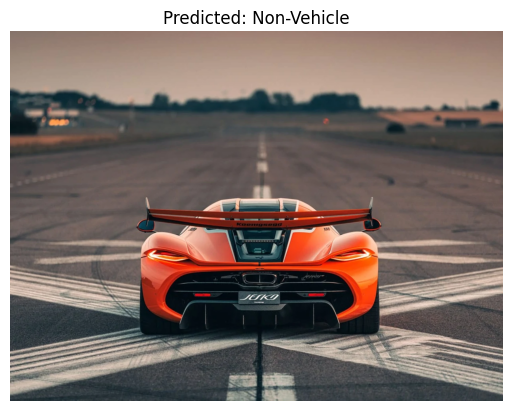

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Function to preprocess the image
def preprocess_image(image_path, target_size):
    img = Image.open(image_path).resize(target_size)
    img_np = np.array(img) / 255.0
    return img_np

# Load and preprocess the image
image_path = '/content/koenigsegg-jesko-5.webp'  # Replace with the path to your image
target_size = (64, 64)
image_np = preprocess_image(image_path, target_size)

# Use the trained model to predict the class of the image
prediction = model.predict(np.expand_dims(image_np, axis=0))
predicted_label = 1 if prediction >= 0.5 else 0

# Visualize the result
plt.imshow(Image.open(image_path))
plt.title(f'Predicted: {"Vehicle" if predicted_label == 1 else "Non-Vehicle"}')
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 42ms/step


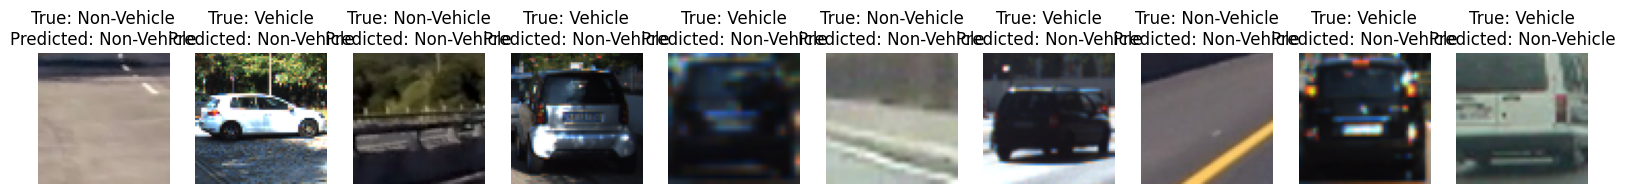

In [ ]:
import matplotlib.pyplot as plt

def plot_sample_predictions(model, X_test, y_test, num_samples=10):
    indices = np.random.choice(range(len(X_test)), num_samples)
    fig, axes = plt.subplots(1, num_samples, figsize=(20, 4))

    for i, idx in enumerate(indices):
        img = X_test[idx]
        true_label = y_test[idx]
        pred_label = (model.predict(np.expand_dims(img, axis=0)) >= 0.5).astype(int)[0, 0]

        axes[i].imshow(img)
        axes[i].set_title(f'True: {"Vehicle" if true_label == 1 else "Non-Vehicle"}\n'
                          f'Predicted: {"Vehicle" if pred_label == 1 else "Non-Vehicle"}')
        axes[i].axis('off')

    plt.show()

plot_sample_predictions(model, X_test, y_test)


111/111 [==============================] - 10s 89ms/step


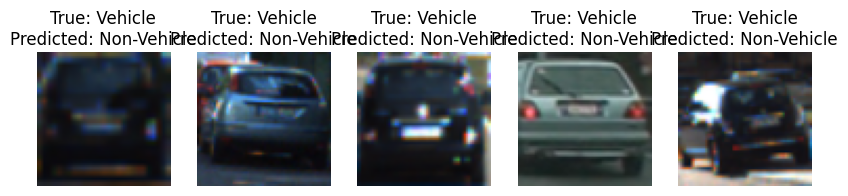

In [ ]:
import matplotlib.pyplot as plt

def plot_mistakes(model, X_test, y_test, num_samples=5):
    y_pred = (model.predict(X_test) >= 0.5).astype(int).flatten()
    mistakes = np.where(y_test != y_pred)[0]

    if len(mistakes) < num_samples:
        print(f"Found only {len(mistakes)} mistakes, displaying all.")
        num_samples = len(mistakes)
    else:
        mistakes = np.random.choice(mistakes, num_samples, replace=False)

    fig, axes = plt.subplots(1, num_samples, figsize=(10, 5))

    for i, idx in enumerate(mistakes):
        img = X_test[idx]
        true_label = y_test[idx]
        pred_label = y_pred[idx]

        axes[i].imshow(img)
        axes[i].set_title(f'True: {"Vehicle" if true_label == 1 else "Non-Vehicle"}\n'
                          f'Predicted: {"Vehicle" if pred_label == 1 else "Non-Vehicle"}')
        axes[i].axis('off')

    plt.show()

plot_mistakes(model, X_test, y_test)


111/111 [==============================] - 9s 78ms/step


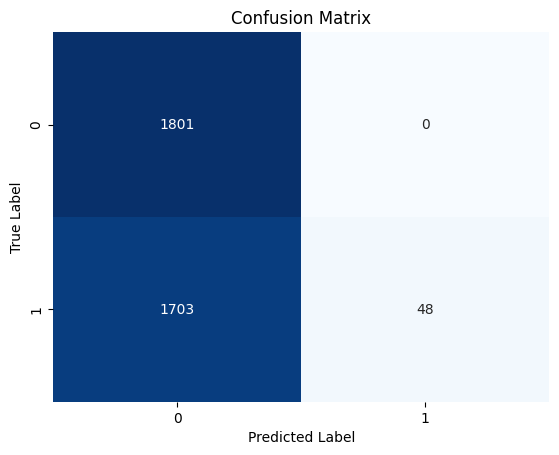

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()

y_pred = (model.predict(X_test) >= 0.5).astype(int)
plot_confusion_matrix(y_test, y_pred)

